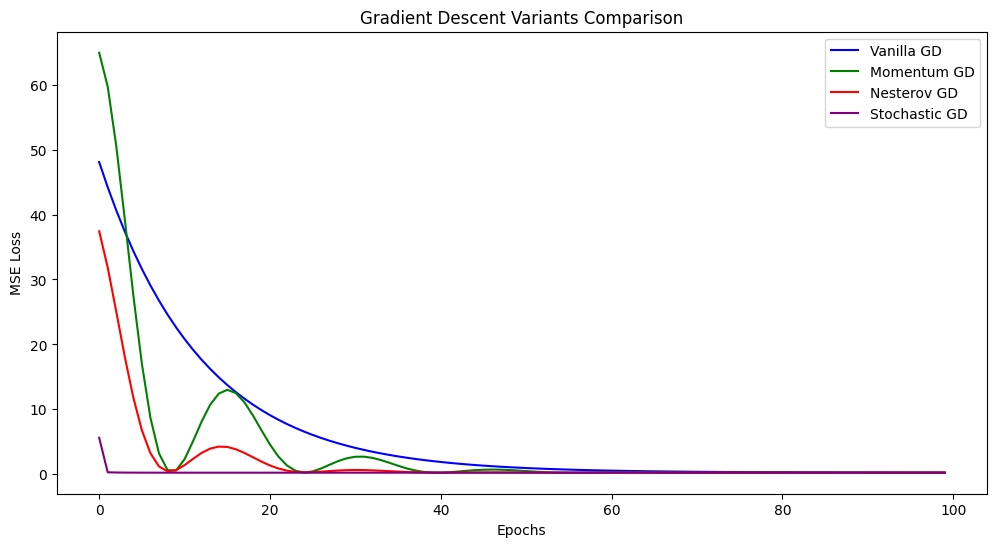

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple linear dataset (y = 3x + 2 with some noise)
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 2 + np.random.randn(100, 1) * 0.5

# Initialize parameters
def initialize_parameters():
    w = np.random.randn()
    b = np.random.randn()
    return w, b

# Compute MSE loss
def compute_loss(y, y_pred):
    return np.mean((y - y_pred) ** 2)

# Gradient Descent (Vanilla GD)
def vanilla_gradient_descent(X, y, learning_rate=0.01, epochs=100):
    w, b = initialize_parameters()
    n = len(y)
    loss_history = []

    for epoch in range(epochs):
        y_pred = w * X + b
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

        # Calculate gradients
        dw = (-2/n) * np.sum(X * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b, loss_history

# Momentum-based Gradient Descent
def momentum_gradient_descent(X, y, learning_rate=0.01, epochs=100, momentum=0.9):
    w, b = initialize_parameters()
    n = len(y)
    loss_history = []
    vw, vb = 0, 0  # Velocity terms for w and b

    for epoch in range(epochs):
        y_pred = w * X + b
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

        # Calculate gradients
        dw = (-2/n) * np.sum(X * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)

        # Update velocity and parameters
        vw = momentum * vw + learning_rate * dw
        vb = momentum * vb + learning_rate * db
        w -= vw
        b -= vb

    return w, b, loss_history

# Nesterov Accelerated Gradient Descent
def nesterov_accelerated_gd(X, y, learning_rate=0.01, epochs=100, momentum=0.9):
    w, b = initialize_parameters()
    n = len(y)
    loss_history = []
    vw, vb = 0, 0  # Velocity terms for w and b

    for epoch in range(epochs):
        # Look ahead by applying momentum
        w_lookahead = w - momentum * vw
        b_lookahead = b - momentum * vb
        
        y_pred = w_lookahead * X + b_lookahead
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

        # Calculate gradients
        dw = (-2/n) * np.sum(X * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)

        # Update velocity and parameters
        vw = momentum * vw + learning_rate * dw
        vb = momentum * vb + learning_rate * db
        w -= vw
        b -= vb

    return w, b, loss_history

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=100):
    w, b = initialize_parameters()
    n = len(y)
    loss_history = []

    for epoch in range(epochs):
        total_loss = 0

        for i in range(n):
            # Pick one random sample
            xi = X[i]
            yi = y[i]
            
            y_pred = w * xi + b
            loss = (yi - y_pred) ** 2
            total_loss += loss

            # Calculate gradients for one sample
            dw = -2 * xi * (yi - y_pred)
            db = -2 * (yi - y_pred)

            # Update parameters
            w -= learning_rate * dw
            b -= learning_rate * db

        avg_loss = total_loss / n
        loss_history.append(avg_loss)

    return w, b, loss_history

# Training and Comparing the Gradient Descent Variants
learning_rate = 0.01
epochs = 100

# Vanilla GD
w_gd, b_gd, loss_gd = vanilla_gradient_descent(X, y, learning_rate, epochs)

# Momentum GD
w_momentum, b_momentum, loss_momentum = momentum_gradient_descent(X, y, learning_rate, epochs)

# Nesterov GD
w_nesterov, b_nesterov, loss_nesterov = nesterov_accelerated_gd(X, y, learning_rate, epochs)

# Stochastic GD
w_sgd, b_sgd, loss_sgd = stochastic_gradient_descent(X, y, learning_rate, epochs)

# Plotting the Loss History
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), loss_gd, label='Vanilla GD', color='blue')
plt.plot(range(epochs), loss_momentum, label='Momentum GD', color='green')
plt.plot(range(epochs), loss_nesterov, label='Nesterov GD', color='red')
plt.plot(range(epochs), loss_sgd, label='Stochastic GD', color='purple')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Gradient Descent Variants Comparison')
plt.legend()
plt.show()
